# Twitter와 Kkma형태소 분석함수에 대한 웹로그기록 분석 비교
1. 210명 부산사람의 11만개 검색어 기록에 대해 부산 사람이 가장 많이 검색하는 문구에 포함된 단어를 알아본다
2. 형태소 분석기는 Twitter()와 Kkma()를 이용해 둘의 검색 결과 차이에 대해 알아본다

In [2]:
import csv
import time

In [4]:
busan = []
with open('busan1.csv', newline='\r\n') as f:
    reader = csv.reader(f)
    for row in reader:
        busan.append(row[0])

# 형태소 분석기

In [5]:
from konlpy.tag import Twitter
from konlpy.tag import Kkma

In [6]:
tagger_twitter = Twitter()
tagger_kkma = Kkma()

# Term-Document Matrix 만들기

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

In [8]:
cv_twitter = CountVectorizer(tokenizer=tagger_twitter.nouns, max_features=5000000)
cv_kkma = CountVectorizer(tokenizer=tagger_kkma.nouns, max_features=5000000)

In [9]:
twitter_t1 = time.time() # start time
tdf_twitter = cv_twitter.fit_transform(busan)
twitter_t2 = time.time() # end time

In [25]:
twitter_t2 - twitter_t1 # twitter matrix 생성시간 144초(2분 24초)

144.9574954509735

In [26]:
kkma_t1 = time.time() # start time
tdf_kkma = cv_kkma.fit_transform(busan)
kkma_t2 = time.time() # end time

In [27]:
kkma_t2 - kkma_t1 # kkma matrix 생성시간 1778초(약30분)

1778.522710800171

In [28]:
tdf_twitter

<111216x29620 sparse matrix of type '<class 'numpy.int64'>'
	with 238964 stored elements in Compressed Sparse Row format>

In [29]:
tdf_kkma

<111216x57130 sparse matrix of type '<class 'numpy.int64'>'
	with 392066 stored elements in Compressed Sparse Row format>

# 단어 목록

In [11]:
word_twitter = cv_twitter.get_feature_names()

In [ ]:
word_kkma = cv_kkma.get_feature_names()

# 한 글자 짜리 단어 빼기

In [12]:
def get_word(doc): # twitter 먼저 진행
    nouns = tagger_twitter.nouns(doc)
    return [noun for noun in nouns if len(noun) > 1]

In [13]:
cv_twitter= CountVectorizer(tokenizer=get_word, max_features=5000000)

In [14]:
tdf_twitter = cv_twitter.fit_transform(word_twitter)

In [15]:
word_twitter = cv_twitter.get_feature_names()

In [41]:
def get_word(doc): # kkma 진행
    nouns = tagger_kkma.nouns(doc)
    return [noun for noun in nouns if len(noun) > 1]

In [42]:
cv_kkma = CountVectorizer(tokenizer=get_word, max_features=5000000)

In [44]:
tdf_kkma = cv_kkma.fit_transform(word_kkma)

In [45]:
word_kkma = cv_kkma.get_feature_names()

# 단어별 출현 빈도

In [16]:
import numpy

In [17]:
count_mat_twitter = tdf_twitter.sum(axis=0)

In [ ]:
count_mat_kkma = tdf_kkma.sum(axis=0)

In [53]:
count_mat_twitter

matrix([[1, 1, 1, ..., 1, 1, 1]], dtype=int64)

In [54]:
count_mat_kkma

matrix([[1, 2, 1, ..., 1, 1, 1]], dtype=int64)

In [18]:
count_twitter = numpy.squeeze(numpy.asarray(count_mat_twitter))

In [59]:
count_kkma = numpy.squeeze(numpy.asarray(count_mat_kkma))

In [19]:
word_count_twitter = list(zip(word_twitter, count_twitter))

In [63]:
word_count_kkma = list(zip(word_kkma, count_kkma))

In [23]:
type(word_count_twitter)

list

In [24]:
with open("twitter.csv", "w") as f: # CSV 파일로 저장(후에 검색어DB만들기 위해)
    writer = csv.writer(f)
    writer.writerows(word_count_twitter)

# 빈도 순 정렬

In [68]:
import operator

In [ ]:
sorted(word_count_twitter, key=operator.itemgetter(1), reverse=True)

In [ ]:
sorted(word_count_kkma, key=operator.itemgetter(1), reverse=True)

# 워드 클라우드

In [71]:
%matplotlib inline

In [72]:
from wordcloud import WordCloud

In [73]:
from matplotlib import pyplot

In [82]:
wc = WordCloud(font_path='C:\\Windows\\Fonts\\malgun.ttf', background_color='white', width=400, height=300)
cloud_twitter = wc.generate_from_frequencies(word_count_twitter)

In [79]:
cloud_kkma = wc.generate_from_frequencies(word_count_kkma)

화면에 표시

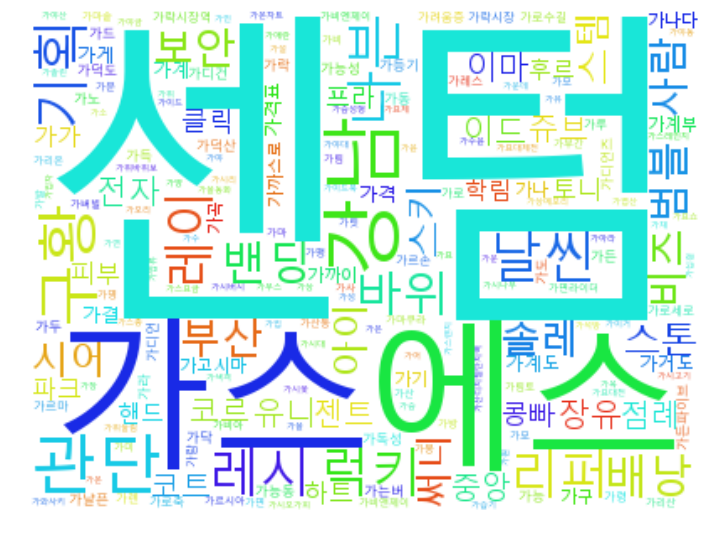

In [83]:
pyplot.figure(figsize=(12, 9))
pyplot.imshow(cloud_twitter)
pyplot.axis("off")
pyplot.show()

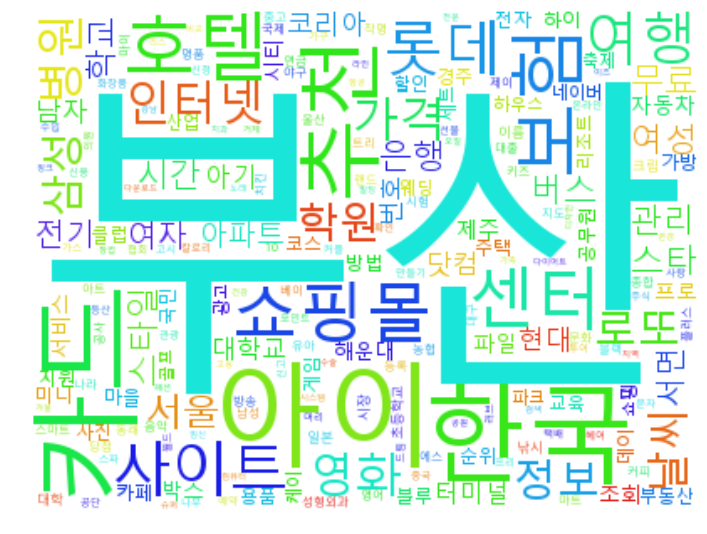

In [81]:
pyplot.figure(figsize=(12, 9))
pyplot.imshow(cloud_kkma)
pyplot.axis("off")
pyplot.show()

# 결론
1. 단어수가 많은 경우 kkma가 twitter보다 형태소 분석 시간이 월등히 오래 걸린다.(본인 컴퓨터로, 이번 데이터의 경우 약 12배 차이)
2. twitter의 경우 형태소 분석 결과가 그렇게 좋은 편이 못 된다. 11만개 검색어 분석에서 제일 많이 나온 단어가 '센텀'이며 3번 나온다.
   반면에 kkma같은 경우 '부산'이라는 단어가 653번 나온다
3. 워드클라우드를 보면 결과를 시각화할수 있는데, 어쨌든 twitter도 센텀이라는...부산의 명소를 제일 많이 보여준다 그러나 두번째 글씨 크기인, 즉 그 다음 많은 빈도의 글자가 가스, 에스라는 이상한 단어를 추출한다
4. 더 정확한 분석을 할때는 kkma를 이용해야 한다